In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n = 50
rec_scores = np.random.rand(n)
rec_scores = rec_scores / np.max(rec_scores)
pop_scores = np.random.randint(300, size=n)
pop_scores = pop_scores / np.max(pop_scores)

In [15]:
pop_scores[:5]

array([0.31418919, 0.71959459, 0.91554054, 0.91216216, 0.63513514])

In [16]:
rec_scores[:5]

array([0.82777458, 0.28594743, 0.02309613, 0.14852763, 0.84702401])

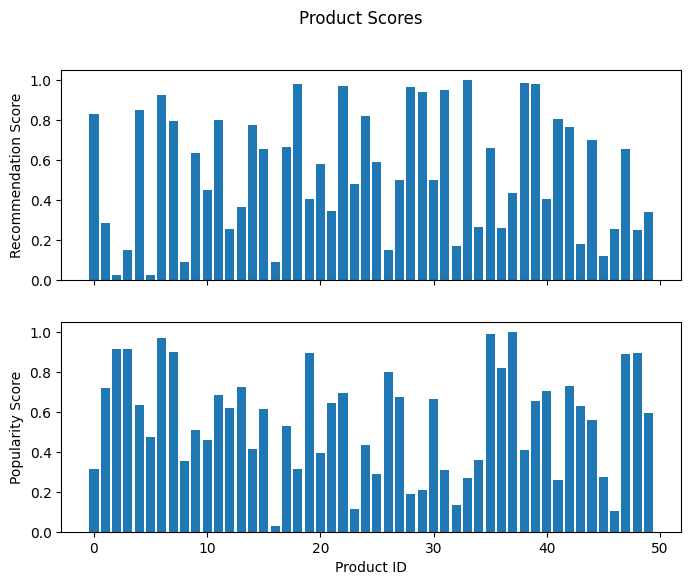

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].bar(np.arange(n), rec_scores)
axs[0].set_ylabel('Recommendation Score')

axs[1].bar(np.arange(n), pop_scores)
axs[1].set_ylabel('Popularity Score')
axs[1].set_xlabel('Product ID')

fig.suptitle('Product Scores')
plt.show()

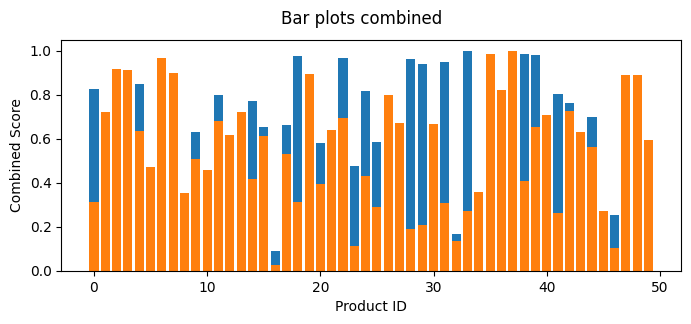

In [18]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(np.arange(n), rec_scores)
ax.bar(np.arange(n), pop_scores)

ax.set_ylabel('Combined Score')
ax.set_xlabel('Product ID')


fig.suptitle('Bar plots combined')
plt.show()

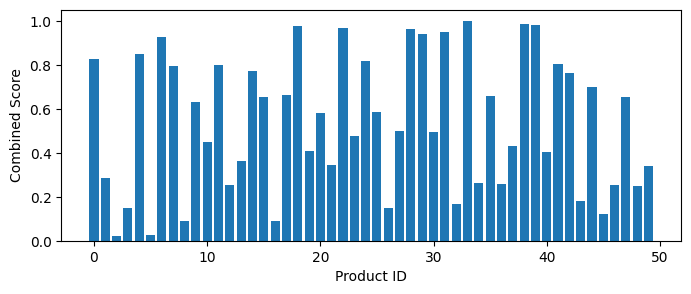

In [19]:
delta = 0
combined_scores = delta*pop_scores + (1-delta)*rec_scores

fig, ax = plt.subplots(figsize=(8, 3))

ax.bar(np.arange(n), combined_scores)
ax.set_ylabel('Combined Score')
ax.set_xlabel('Product ID')
# ax.set_title(f'Combined scores of products using delta={delta}')

plt.show()

In [46]:
epsilon = 8
p = np.exp(epsilon * combined_scores)
p = p/sum(p)

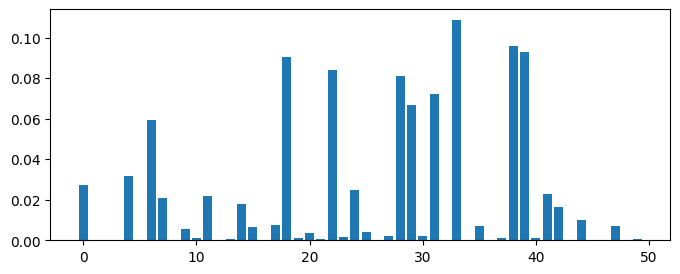

In [47]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.bar(np.arange(n), p)
plt.show()

In [35]:
combined_scores.argsort()[-5:][::-1]

array([33, 38, 39, 18, 22])

In [59]:
pop_scores.argsort()[-10:][::-1]

array([ 0,  7,  8, 24, 12, 43, 11, 15, 20,  4])

In [60]:
rec_scores.argsort()[-10:][::-1]

array([ 6, 17, 33,  7,  9,  2,  5,  0,  3, 27])

Fetch Recommendations

In [9]:
number_of_recommendations = 5
cdf_products = np.cumsum(combined_scores)
rec_products = np.zeros(number_of_recommendations, dtype=int)
for i in range(number_of_recommendations):
    found_new_product = False
    while not found_new_product:
        rand_p = np.random.rand()
        candidate_rec_product = np.argmax(rand_p <= cdf_products)
        found_new_product = all(candidate_rec_product != rec_products)
        rec_products[i] = candidate_rec_product

In [10]:
rec_products

array([36, 44,  4, 12, 42])

In [63]:
# epsilon = 30

# # pop_scores = np.random.rand(n)
# # p = np.random.randint(300, size=n) / np.max(pop_scores)

# p = np.exp(epsilon * pop_scores)
# p = p / np.sum(p)

# # print(p)

# fig, ax = plt.subplots(figsize=(8, 3))

# ax.bar(np.arange(n), p)
# ax.set_ylabel('PDF')
# ax.set_xlabel('Product ID')
# ax.set_title(f'PDF of product selection using epsilon={epsilon}')

# plt.show()

In [64]:
# epsilon = 30
# p = np.exp(epsilon * combined_scores)
# p = p / np.sum(p)

In [38]:
number_of_recommendations = 10
cdf_products = np.cumsum(p)
rec_products = np.zeros(number_of_recommendations, dtype=int)
for i in range(number_of_recommendations):
    found_new_product = False
    while not found_new_product:
        rand_p = np.random.rand()
        candidate_rec_product = np.argmax(rand_p <= cdf_products)
        found_new_product = all(candidate_rec_product != rec_products)
        rec_products[i] = candidate_rec_product

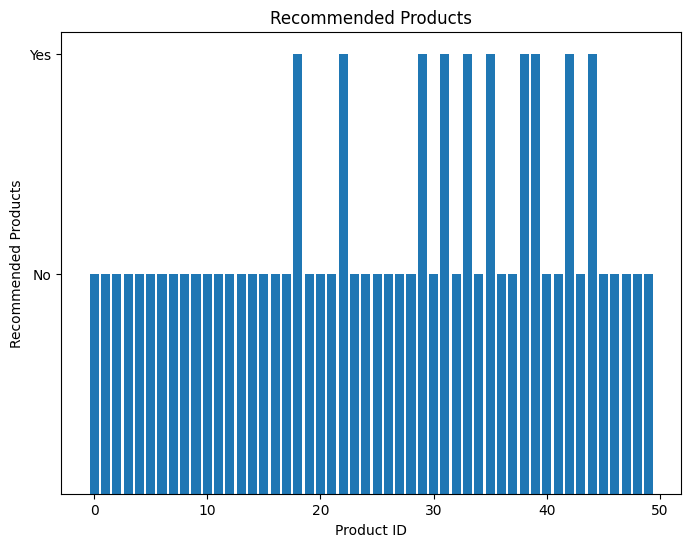

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
temp_indicator = 0.5*np.ones(n)
temp_indicator[rec_products] = 1
ax.bar(np.arange(n), temp_indicator)
ax.set_ylabel('Recommended Products')
ax.set_xlabel('Product ID')
ax.set_title('Recommended Products')
ax.set_yticks([0.5, 1])
ax.set_yticklabels(['No', 'Yes'])

plt.show()